## MovieLens EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt   
import seaborn as sns

#### Import 3 files from the folder as data frames:
1. u.data
2. u.item
3. u.user

In [2]:
rating_df = pd.read_csv("u.data", sep='\t', names=('user_id', 'movie_id', 'rating', 'timestamp'))
movie_df = pd.read_csv("u.item", sep='|', encoding="ANSI", names=('movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDB_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film_Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'))
user_df = pd.read_csv("u.user", sep='|', names=('user_id', 'age', 'gender', 'occupation', 'zip_code'))

In [3]:
print(rating_df.head())
print(rating_df.info())

   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id      100000 non-null int64
movie_id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB
None


In [4]:
print(movie_df.head())
print(movie_df.info())

   movie_id        movie_title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDB_URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children  ...  Fantasy  Film_Noir  Horror  Musical  \
0          0          1         1  ...        0          0       0        0   


In [5]:
print(user_df.head())
print(user_df.info())

   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None


#### Display univariate plots of the attributes: 'rating', 'age', 'release date', 'gender' and 'occupation', from their respective data frames

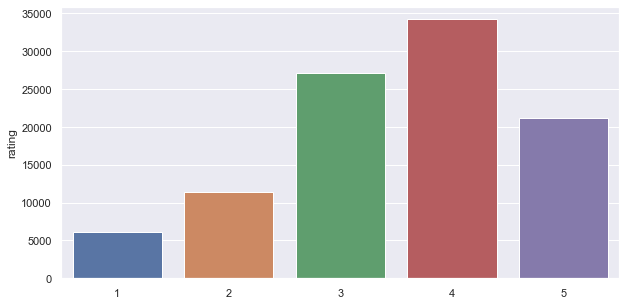

In [6]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x=rating_df["rating"].value_counts().index, y=rating_df["rating"].value_counts())

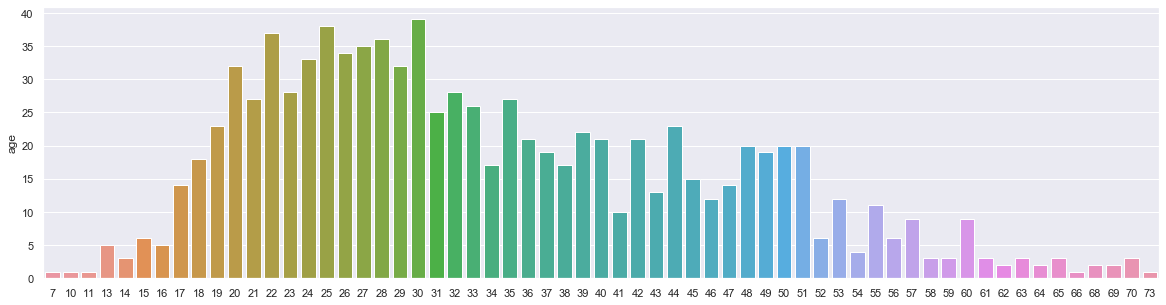

In [7]:
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x=user_df["age"].value_counts().index, y=user_df["age"].value_counts())

C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


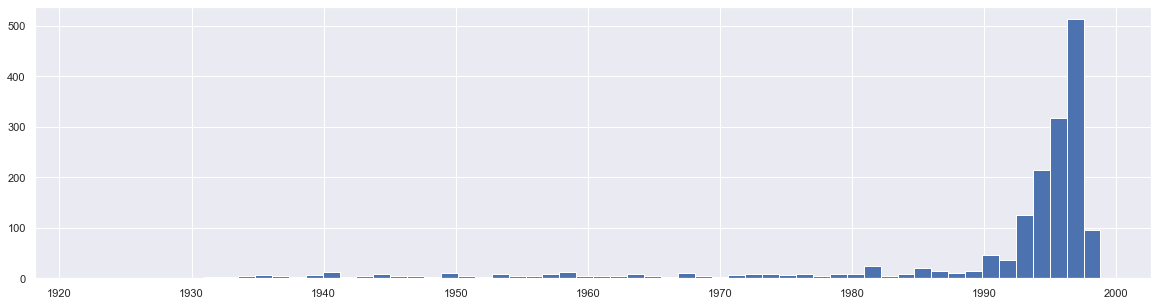

In [8]:
movie_df["release_date_type"] = pd.to_datetime(movie_df["release_date"].values);
minDateNum = matplotlib.dates.date2num(movie_df["release_date_type"].min()) #701631
maxDateNum = matplotlib.dates.date2num(movie_df["release_date_type"].max()) #729685
distance = maxDateNum - minDateNum;
numOfSlots = 60;
slots = [];
for i in range(0, numOfSlots+1):
    slots.append(minDateNum + distance*i/numOfSlots);
plt.hist(movie_df["release_date_type"], bins=slots)
del movie_df["release_date_type"]
# plt.hist(movie_df[-movie_df["release_date"].isnull()]["release_date"], bins=50)

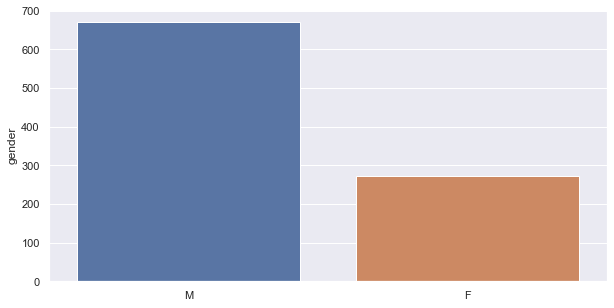

In [9]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x=user_df["gender"].value_counts().index, y=user_df["gender"].value_counts())

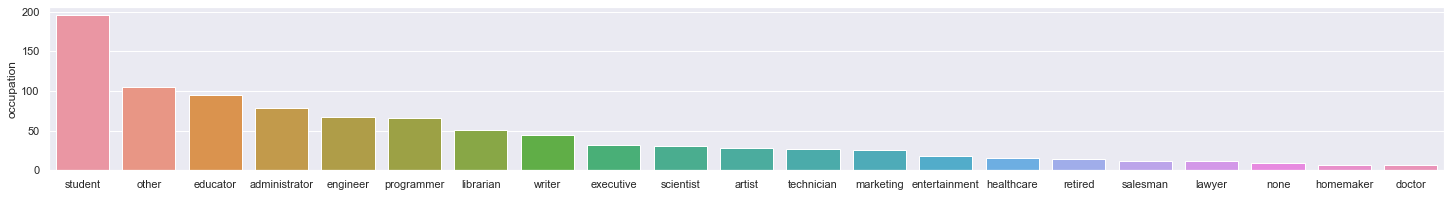

In [10]:
sns.set(rc={'figure.figsize':(25,3)})
sns.barplot(x=user_df["occupation"].value_counts().index, y=user_df["occupation"].value_counts())

#### Display the top 25 movies by average rating, as a list/series/dataframe.
Note: Consider only the movies which received atleast a 100 ratings

In [11]:
movie_rating_df = movie_df.merge(pd.DataFrame({'rating_sum': rating_df.groupby("movie_id").rating.sum()}), on="movie_id")
movie_rating_df = movie_rating_df.merge(pd.DataFrame({'rating_avg': rating_df.groupby("movie_id").rating.mean()}), on="movie_id")
movie_rating_df[(movie_rating_df['rating_sum'] >= 100)].sort_values("rating_avg", ascending=False).head(25)[["movie_id", "movie_title", "release_date", "rating_sum", "rating_avg"]]

,movie_id,movie_title,release_date,rating_sum,rating_avg
407,408,"Close Shave, A (1995)",28-Apr-1996,503,4.491071
317,318,Schindler's List (1993),01-Jan-1993,1331,4.466443
168,169,"Wrong Trousers, The (1993)",01-Jan-1993,527,4.466102
482,483,Casablanca (1942),01-Jan-1942,1083,4.456790
113,114,Wallace & Gromit: The Best of Aardman Animatio...,05-Apr-1996,298,4.447761
63,64,"Shawshank Redemption, The (1994)",01-Jan-1994,1258,4.445230
602,603,Rear Window (1954),01-Jan-1954,917,4.387560
11,12,"Usual Suspects, The (1995)",14-Aug-1995,1171,4.385768
49,50,Star Wars (1977),01-Jan-1977,2541,4.358491
177,178,12 Angry Men (1957),01-Jan-1957,543,4.344000


#### Verify the following statements:

In [12]:
rating_user_df = rating_df.merge(user_df, on="user_id")
rating_user_df = rating_user_df.merge(pd.DataFrame({'movie_id': movie_df["movie_id"], 'Drama': movie_df["Drama"], 'Romance': movie_df["Romance"], 'Sci-Fi': movie_df["Sci-Fi"]}), on="movie_id")
rating_user_df.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,Drama,Romance,Sci-Fi
0,196,242,3,881250949,49,M,writer,55105,0,0,0
1,305,242,5,886307828,23,M,programmer,94086,0,0,0
2,6,242,4,883268170,42,M,executive,98101,0,0,0
3,234,242,4,891033261,60,M,retired,94702,0,0,0
4,63,242,3,875747190,31,M,marketing,75240,0,0,0


1. Men watch more Drama than women

In [13]:
men_drama_view = rating_user_df[rating_user_df['gender'] == 'M'].sum()["Drama"]
women_drama_view = rating_user_df[rating_user_df['gender'] == 'F'].sum()["Drama"]
print("men_drama_view = " + str(men_drama_view) + "; women_drama_view = " + str(women_drama_view))
print(men_drama_view > women_drama_view)

men_drama_view = 28887; women_drama_view = 11008
True


2. Men watch more Romance than women

In [14]:
men_romance_view = rating_user_df[rating_user_df['gender'] == 'M'].sum()["Romance"]
women_romance_view = rating_user_df[rating_user_df['gender'] == 'F'].sum()["Romance"]
print("men_romance_view = " + str(men_romance_view) + "; women_romance_view = " + str(women_romance_view))
print(men_romance_view > women_romance_view)

men_romance_view = 13603; women_romance_view = 5858
True


3. Women watch more Sci-Fi than men

In [15]:
men_scifi_view = rating_user_df[rating_user_df['gender'] == 'M'].sum()["Sci-Fi"]
women_scifi_view = rating_user_df[rating_user_df['gender'] == 'F'].sum()["Sci-Fi"]
print("men_scifi_view = " + str(men_scifi_view) + "; women_scifi_view = " + str(women_scifi_view))
print(women_scifi_view > men_scifi_view)

men_scifi_view = 10101; women_scifi_view = 2629
False


#### Visualize how popularity of Genres has changed over the years

In [16]:
movie_df["release_year"] = pd.to_datetime(movie_df["release_date"].values).year
release_genres_df = pd.DataFrame()
release_genres_df["release_year"] = pd.to_datetime(movie_df["release_date"].values).year.unique()

# 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film_Noir', 
# 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
release_genres_df = release_genres_df.merge(pd.DataFrame({'Action': movie_df[movie_df["Action"] == 1].groupby("release_year").Action.count()}), how="left", on="release_year")
release_genres_df = release_genres_df.merge(pd.DataFrame({'Adventure': movie_df[movie_df["Adventure"] == 1].groupby("release_year").Adventure.count()}), how="left", on="release_year")
release_genres_df = release_genres_df.merge(pd.DataFrame({'Animation': movie_df[movie_df["Animation"] == 1].groupby("release_year").Animation.count()}), how="left", on="release_year")
release_genres_df = release_genres_df.merge(pd.DataFrame({'Children': movie_df[movie_df["Children"] == 1].groupby("release_year").Children.count()}), how="left", on="release_year")
release_genres_df = release_genres_df.merge(pd.DataFrame({'Comedy': movie_df[movie_df["Comedy"] == 1].groupby("release_year").Comedy.count()}), how="left", on="release_year")
release_genres_df = release_genres_df.merge(pd.DataFrame({'Crime': movie_df[movie_df["Crime"] == 1].groupby("release_year").Crime.count()}), how="left", on="release_year")
release_genres_df = release_genres_df.merge(pd.DataFrame({'Documentary': movie_df[movie_df["Documentary"] == 1].groupby("release_year").Documentary.count()}), how="left", on="release_year")
release_genres_df = release_genres_df.merge(pd.DataFrame({'Drama': movie_df[movie_df["Drama"] == 1].groupby("release_year").Drama.count()}), how="left", on="release_year")
release_genres_df = release_genres_df.merge(pd.DataFrame({'Fantasy': movie_df[movie_df["Fantasy"] == 1].groupby("release_year").Fantasy.count()}), how="left", on="release_year")
release_genres_df = release_genres_df.merge(pd.DataFrame({'Film_Noir': movie_df[movie_df["Film_Noir"] == 1].groupby("release_year").Film_Noir.count()}), how="left", on="release_year")
release_genres_df = release_genres_df.merge(pd.DataFrame({'Horror': movie_df[movie_df["Horror"] == 1].groupby("release_year").Horror.count()}), how="left", on="release_year")
release_genres_df = release_genres_df.merge(pd.DataFrame({'Musical': movie_df[movie_df["Musical"] == 1].groupby("release_year").Musical.count()}), how="left", on="release_year")
release_genres_df = release_genres_df.merge(pd.DataFrame({'Mystery': movie_df[movie_df["Mystery"] == 1].groupby("release_year").Mystery.count()}), how="left", on="release_year")
release_genres_df = release_genres_df.merge(pd.DataFrame({'Romance': movie_df[movie_df["Romance"] == 1].groupby("release_year").Romance.count()}), how="left", on="release_year")
release_genres_df = release_genres_df.merge(pd.DataFrame({'Sci-Fi': movie_df[movie_df["Sci-Fi"] == 1].groupby("release_year")["Sci-Fi"].count()}), how="left", on="release_year")
release_genres_df = release_genres_df.merge(pd.DataFrame({'Thriller': movie_df[movie_df["Thriller"] == 1].groupby("release_year").Thriller.count()}), how="left", on="release_year")
release_genres_df = release_genres_df.merge(pd.DataFrame({'War': movie_df[movie_df["War"] == 1].groupby("release_year").War.count()}), how="left", on="release_year")
release_genres_df = release_genres_df.merge(pd.DataFrame({'Western': movie_df[movie_df["Western"] == 1].groupby("release_year").Western.count()}), how="left", on="release_year")
release_genres_df.fillna(0, inplace=True)
release_genres_df['most_popular_genre'] = release_genres_df[['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film_Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].idxmax(axis=1)
release_genres_df['most_num_of_movies'] = release_genres_df[['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film_Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].max(axis=1)
release_genres_df.head(5)

del movie_df["release_year"]

From the graph one should be able to see for any given year, movies of which genre got released the most:

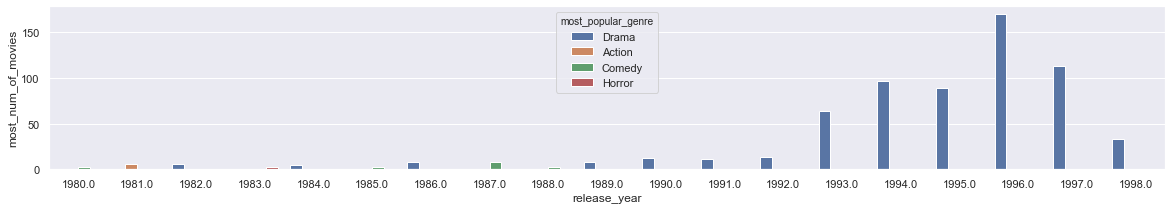

In [17]:
sns.set(rc={'figure.figsize':(20,3)})
sns.barplot(data=release_genres_df[release_genres_df["release_year"] > 1979], x="release_year", y="most_num_of_movies", hue="most_popular_genre")
# release_genres_df[release_genres_df['release_year'] == 1981]['most_popular_genre'] # Action, 13

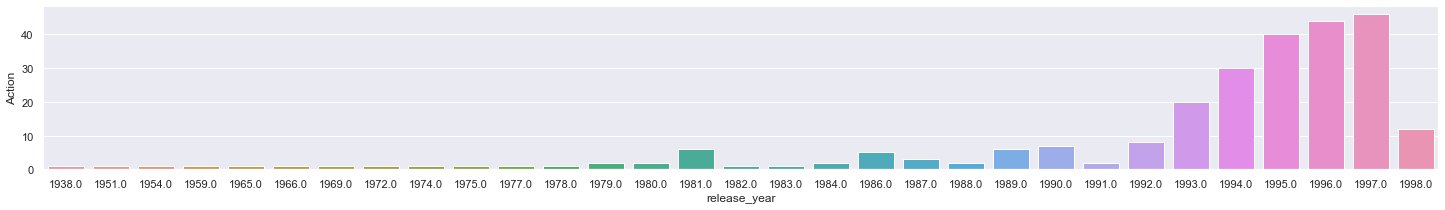

In [18]:
sns.set(rc={'figure.figsize':(25,3)})
sns.barplot(data=release_genres_df[release_genres_df["Action"] > 0], x="release_year", y="Action")

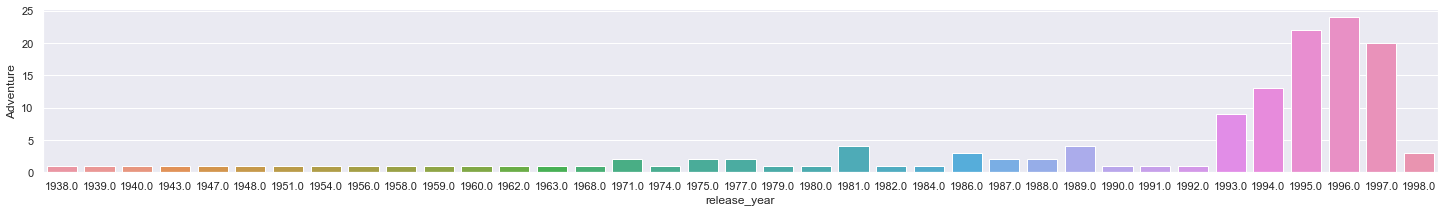

In [19]:
sns.barplot(data=release_genres_df[release_genres_df["Adventure"] > 0], x="release_year", y="Adventure")

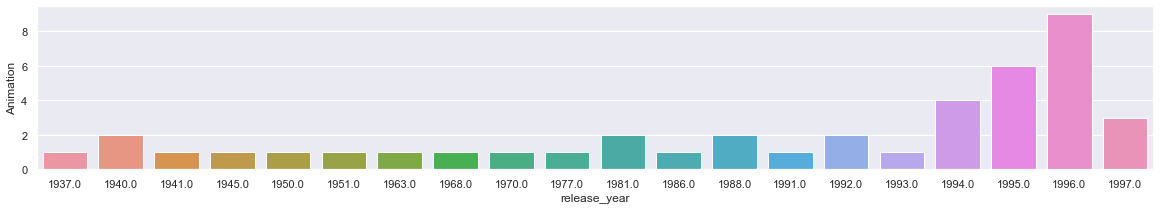

In [20]:
sns.set(rc={'figure.figsize':(20,3)})
sns.barplot(data=release_genres_df[release_genres_df["Animation"] > 0], x="release_year", y="Animation")

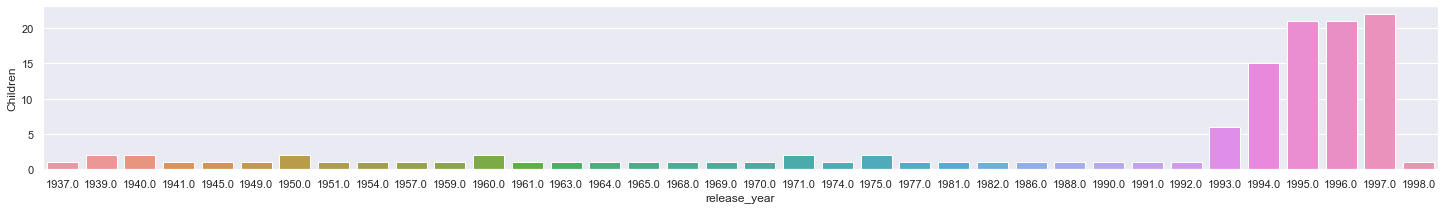

In [21]:
sns.set(rc={'figure.figsize':(25,3)})
sns.barplot(data=release_genres_df[release_genres_df["Children"] > 0], x="release_year", y="Children")

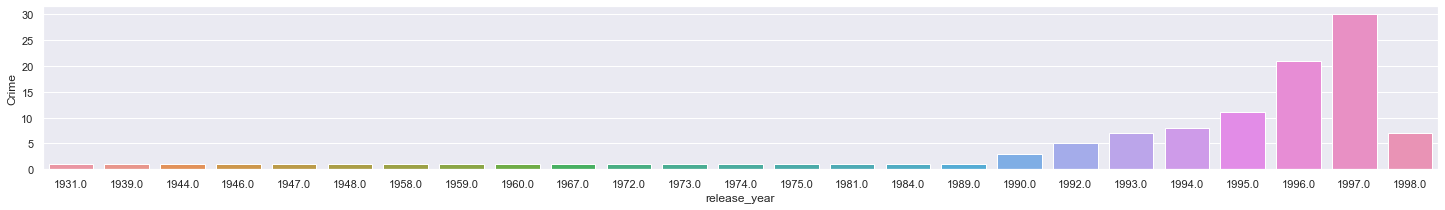

In [22]:
sns.barplot(data=release_genres_df[release_genres_df["Crime"] > 0], x="release_year", y="Crime")

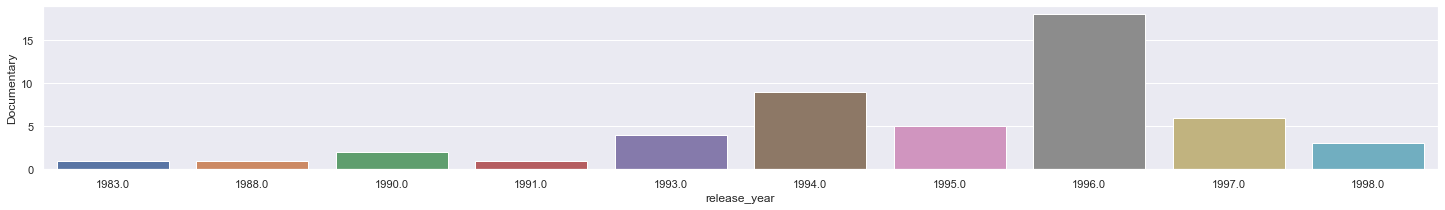

In [23]:
sns.barplot(data=release_genres_df[release_genres_df["Documentary"] > 0], x="release_year", y="Documentary")

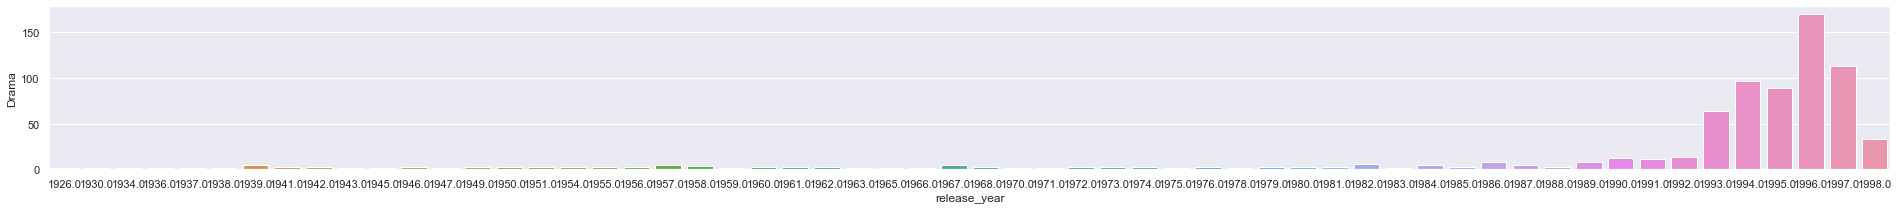

In [24]:
sns.set(rc={'figure.figsize':(33,3)})
sns.barplot(data=release_genres_df[release_genres_df["Drama"] > 0], x="release_year", y="Drama")

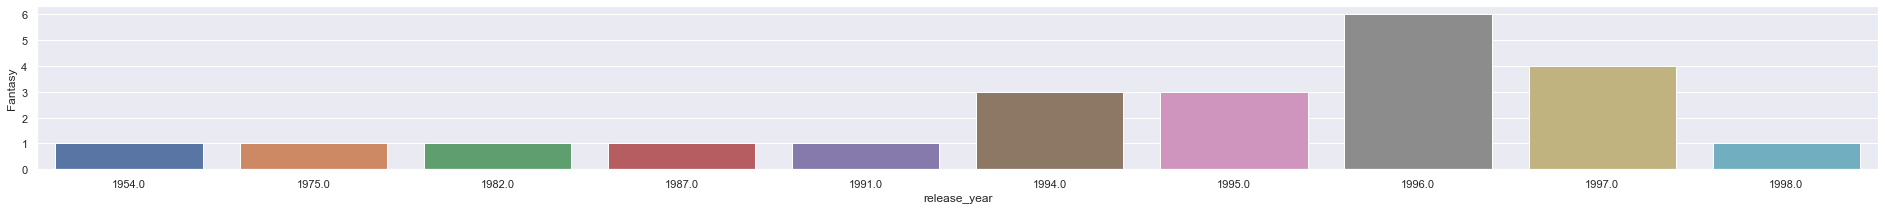

In [25]:
sns.barplot(data=release_genres_df[release_genres_df["Fantasy"] > 0], x="release_year", y="Fantasy")

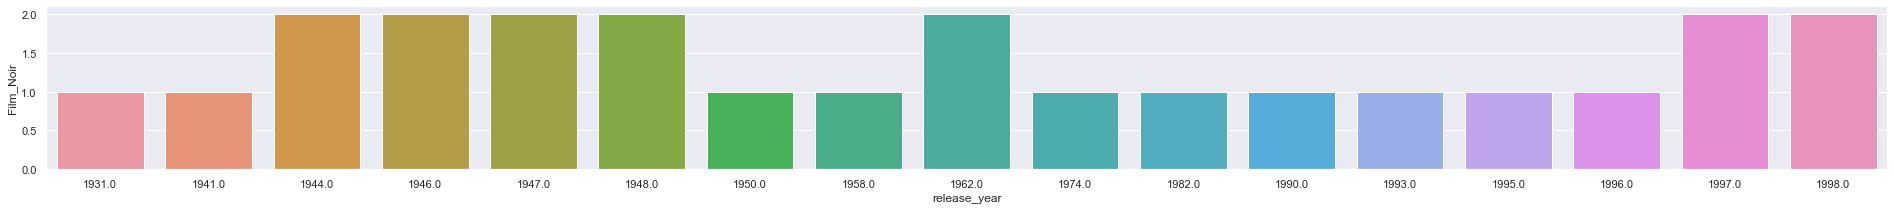

In [26]:
sns.barplot(data=release_genres_df[release_genres_df["Film_Noir"] > 0], x="release_year", y="Film_Noir")

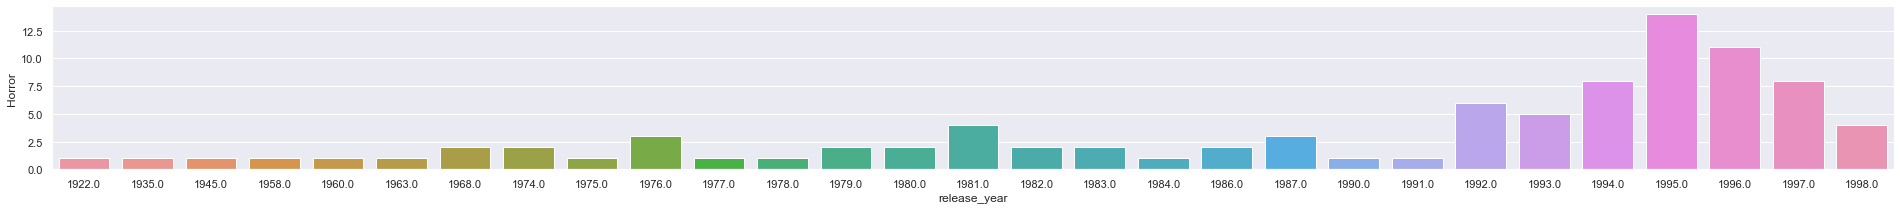

In [27]:
sns.barplot(data=release_genres_df[release_genres_df["Horror"] > 0], x="release_year", y="Horror")

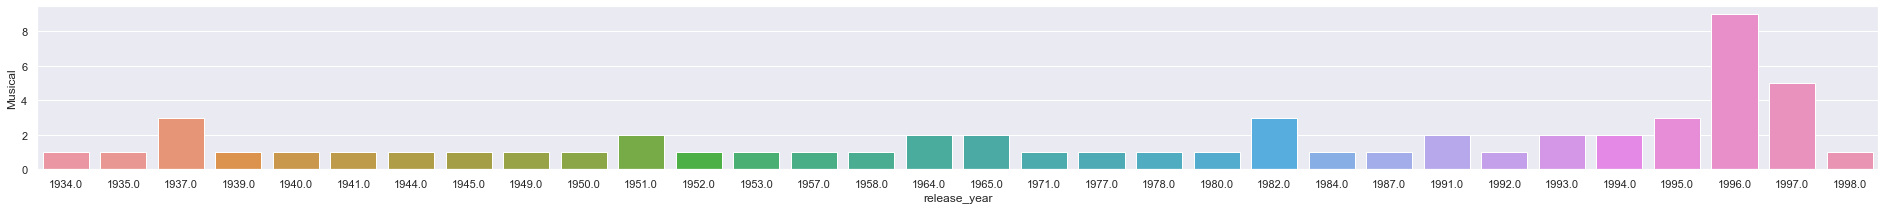

In [28]:
sns.barplot(data=release_genres_df[release_genres_df["Musical"] > 0], x="release_year", y="Musical")

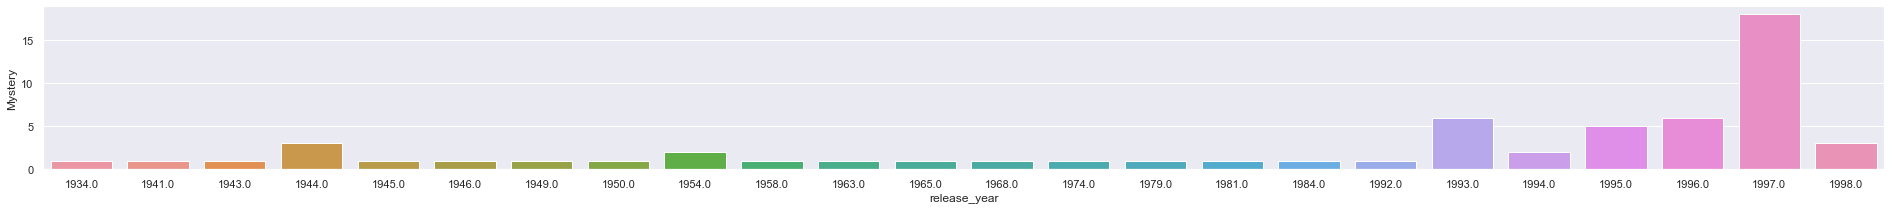

In [29]:
sns.barplot(data=release_genres_df[release_genres_df["Mystery"] > 0], x="release_year", y="Mystery")

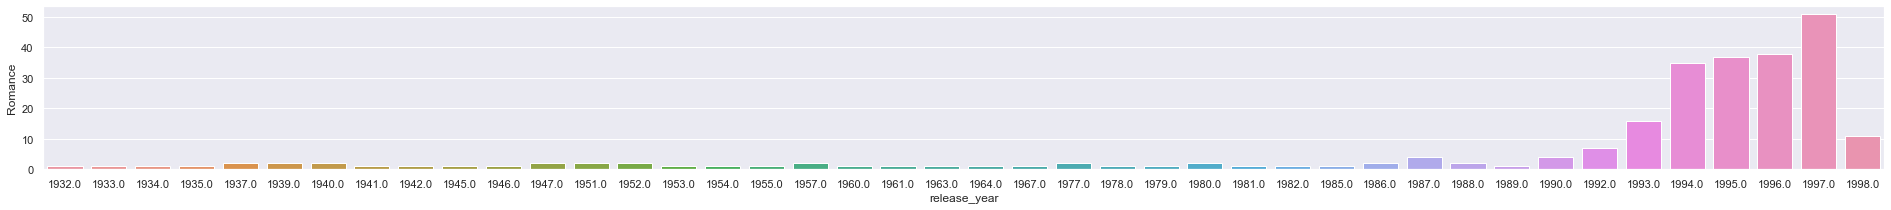

In [30]:
sns.barplot(data=release_genres_df[release_genres_df["Romance"] > 0], x="release_year", y="Romance")

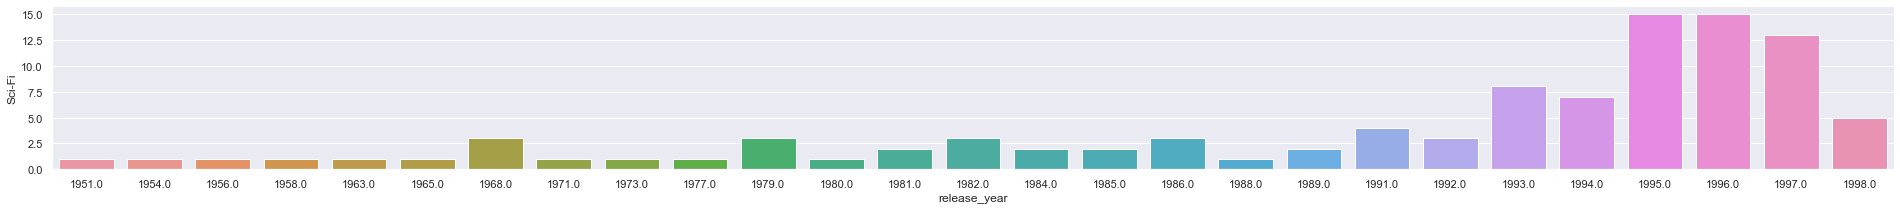

In [31]:
sns.barplot(data=release_genres_df[release_genres_df["Sci-Fi"] > 0], x="release_year", y="Sci-Fi")

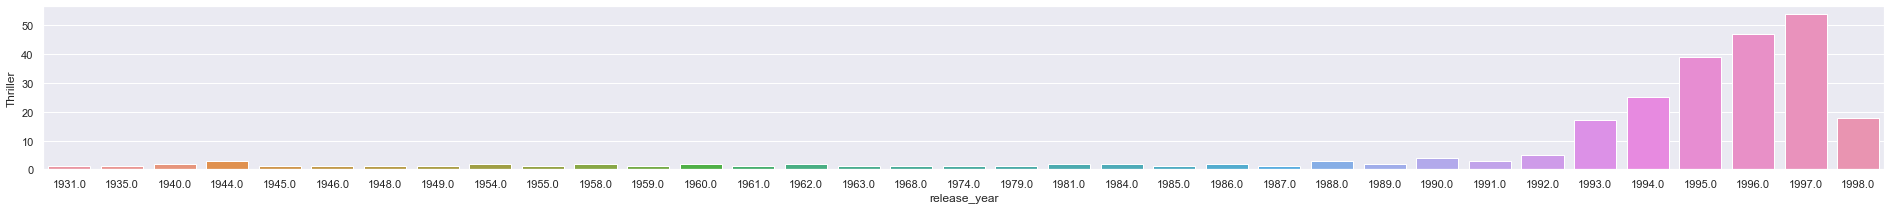

In [32]:
sns.barplot(data=release_genres_df[release_genres_df["Thriller"] > 0], x="release_year", y="Thriller")

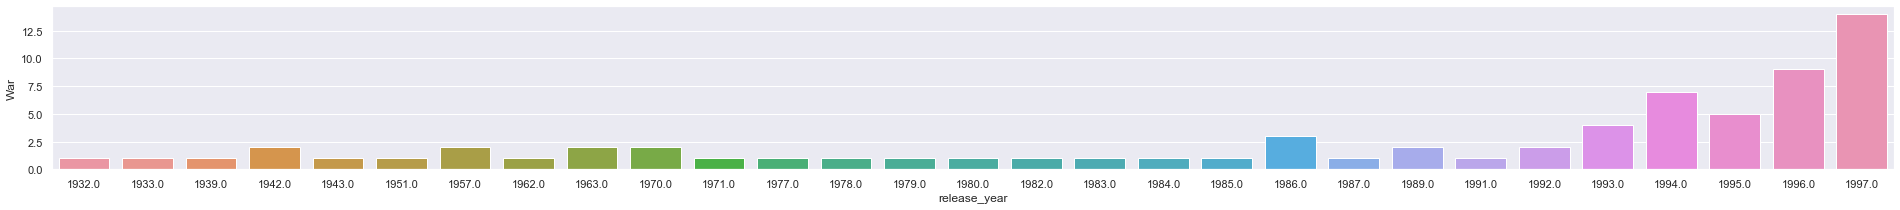

In [33]:
sns.barplot(data=release_genres_df[release_genres_df["War"] > 0], x="release_year", y="War")

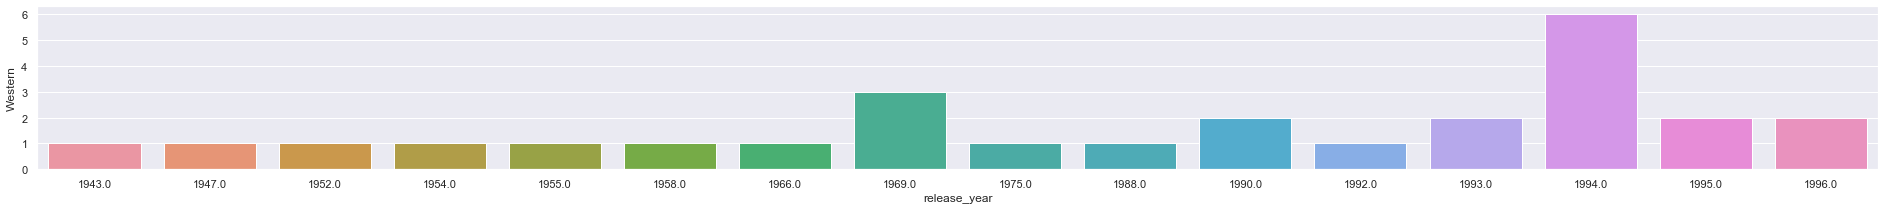

In [34]:
sns.barplot(data=release_genres_df[release_genres_df["Western"] > 0], x="release_year", y="Western")